In [424]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [425]:
df_BANK_marketing=df['BANK_marketing']

In [426]:
df_BANK_marketing.head()


,id,age,job,marital,education,faltante,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,6,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [427]:
df_BANK_marketing

,id,age,job,marital,education,faltante,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,6,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11159,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,11160,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,11161,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,11162,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


## 1. Dataset con limpieza de datos

Ya tenemos todos los datos limpios y esto se puede comprobar, ya que ya no tenemos null. En principio, no deberían haber outliers


In [428]:
df_BANK_marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11162 non-null  int64 
 1   age        11162 non-null  int64 
 2   job        11162 non-null  object
 3   marital    11162 non-null  object
 4   education  11162 non-null  object
 5   faltante   11162 non-null  int64 
 6   balance    11162 non-null  int64 
 7   housing    11162 non-null  int64 
 8   loan       11162 non-null  int64 
 9   contact    11162 non-null  object
 10  day        11162 non-null  int64 
 11  month      11162 non-null  object
 12  duration   11162 non-null  int64 
 13  campaign   11162 non-null  int64 
 14  pdays      11162 non-null  int64 
 15  previous   11162 non-null  int64 
 16  poutcome   11162 non-null  object
 17  deposit    11162 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 1.5+ MB


In [429]:
df_BANK_marketing['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [430]:
df_BANK_marketing['marital'].value_counts()

marital
married     6354
single      3517
divorced    1291
Name: count, dtype: int64

In [431]:
df_BANK_marketing['education'].value_counts()

education
secondary    5479
tertiary     3687
primary      1500
unknown       496
Name: count, dtype: int64

In [432]:
df_BANK_marketing['faltante'].value_counts()

faltante
0    10994
1      168
Name: count, dtype: int64

In [433]:
df_BANK_marketing['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [434]:
df_BANK_marketing['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

## 2. Análisis exploratorio de datos (EDA)

In [435]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [436]:
df_BANK_vista_marketing['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [437]:
#Per poder analitzar la segona pregunta de l'exercici
#filtro_cellular=df_BANK_vista_marketing['contact']=='telephone'
#df_BANK_vista_marketing=df_BANK_vista_marketing[filtro_cellular]

df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,3222.336342,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,2792.250000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,5582.500000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,8372.750000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,11163.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


### 2.1 Recodificación columna poutcome

In [438]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11162 non-null  int64 
 1   contact   11162 non-null  object
 2   day       11162 non-null  int64 
 3   month     11162 non-null  object
 4   duration  11162 non-null  int64 
 5   campaign  11162 non-null  int64 
 6   pdays     11162 non-null  int64 
 7   previous  11162 non-null  int64 
 8   poutcome  11162 non-null  object
 9   deposit   11162 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 872.2+ KB


In [439]:
def recod_poutcome(serie):

    match serie:

        case 'unknown':
          return 0
        case 'other':
          return 0
        case 'failure':
          return 0
        case 'success':
          return 1
       
df_BANK_vista_marketing["recod_poutcome"]=df_BANK_vista_marketing["poutcome"].apply(recod_poutcome)

df_BANK_vista_marketing

C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\1059009831.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["recod_poutcome"]=df_BANK_vista_marketing["poutcome"].apply(recod_poutcome)


,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome
0,1,unknown,5,may,1042,1,-1,0,unknown,1,0
1,3,unknown,5,may,1467,1,-1,0,unknown,1,0
2,4,unknown,5,may,1389,1,-1,0,unknown,1,0
3,5,unknown,5,may,579,1,-1,0,unknown,1,0
4,6,unknown,5,may,673,2,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11157,11159,cellular,20,apr,257,1,-1,0,unknown,0,0
11158,11160,unknown,16,jun,83,4,-1,0,unknown,0,0
11159,11161,cellular,19,aug,156,2,-1,0,unknown,0,0
11160,11162,cellular,8,may,9,2,172,5,failure,0,0


In [440]:
filter_deposit_1=df_BANK_vista_marketing['deposit']==1
filter_deposit_0=df_BANK_vista_marketing['deposit']==0

df_BANK_vista_marketing[filter_deposit_1]

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome
0,1,unknown,5,may,1042,1,-1,0,unknown,1,0
1,3,unknown,5,may,1467,1,-1,0,unknown,1,0
2,4,unknown,5,may,1389,1,-1,0,unknown,1,0
3,5,unknown,5,may,579,1,-1,0,unknown,1,0
4,6,unknown,5,may,673,2,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5284,5286,cellular,8,apr,335,1,-1,0,unknown,1,0
5285,5287,cellular,27,oct,102,1,180,3,success,1,1
5286,5288,cellular,22,apr,138,2,-1,0,unknown,1,0
5287,5289,cellular,28,jul,431,2,-1,0,unknown,1,0


Hago un histograma para ver la distribución del número de llamadas de la campaña actual

Histograma de la distribución de llamadas para los clientes que contratan depósitos y para los que no


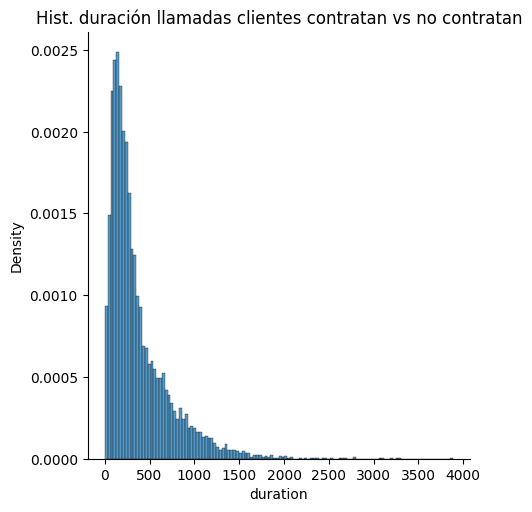

In [441]:
# Graficamos el histograma con seaborn displot
sns.displot(data=df_BANK_vista_marketing,x="duration", kde=False, stat='density')
plt.title('Hist. duración llamadas clientes contratan vs no contratan',loc='center')
plt.show()


Se pude comprobar que parecen dos distribuciones distintas, así que el análisis de anómalos lo podemos hacer por cada función de distribución.


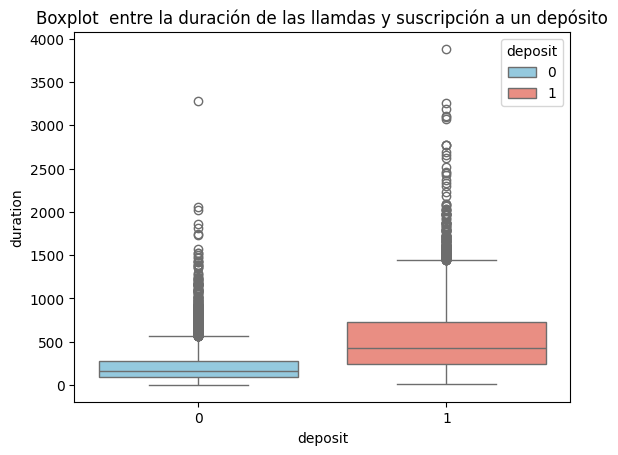

In [442]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='deposit', y='duration', data=df_BANK_vista_marketing,hue="deposit",palette=custom_palette)
plt.title('Boxplot  entre la duración de las llamdas y suscripción a un depósito')
plt.show()


In [443]:

def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['duration'])

def clasificacion_duration(valor):
    
    if  valor < min_Q_ext:
        return "extremo muy bajo"
    elif valor < min_Q:
        return "muy bajo"
    elif valor < Q1:
        return "bajo"
    elif valor < Q2:
        return "medio-bajo"
    elif valor < Q3:
        return "medio-alto"
    elif valor < max_Q:
        return "alto"
    elif valor < max_Q_ext:
        return "muy alto"
    else:
        return "extremo muy alto"
df_BANK_vista_marketing["descripcion_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)



C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\689419347.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["descripcion_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)


C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\3568424679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='duration', data=df_BANK_vista_marketing,palette=custom_palette)
C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\3568424679.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(y='duration', data=df_BANK_vista_marketing,palette=custom_palette)


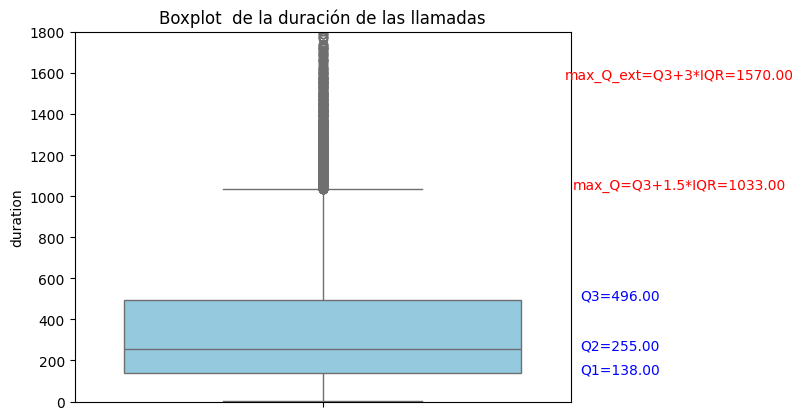

In [444]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
custom_palette = ['skyblue', 'salmon']
sns.boxplot(y='duration', data=df_BANK_vista_marketing,palette=custom_palette)

plt.ylim(0, 1800)
#plt.yticks(np.arange(0, 1700, 138))
plt.title('Boxplot  de la duración de las llamadas')

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['duration'])
# Añadir los textos para los cuartiles y el límite superior
plt.text(0.6, Q1, f'Q1={Q1:.2f}', horizontalalignment='center', color='blue', fontsize=10)
plt.text(0.6, Q2, f'Q2={Q2:.2f}', horizontalalignment='center', color='blue', fontsize=10)
plt.text(0.6, Q3, f'Q3={Q3:.2f}', horizontalalignment='center', color='blue', fontsize=10)
plt.text(0.72, max_Q, f'max_Q=Q3+1.5*IQR={max_Q:.2f}', horizontalalignment='center', color='red', fontsize=10)
plt.text(0.72, max_Q_ext, f'max_Q_ext=Q3+3*IQR={max_Q_ext:.2f}', horizontalalignment='center', color='red', fontsize=10)
plt.show()

In [445]:
df_BANK_vista_marketing.value_counts()

id     contact   day  month  duration  campaign  pdays  previous  poutcome  deposit  recod_poutcome  descripcion_duration
11163  cellular  9    jul    628       1         -1     0         unknown   0        0               alto                    1
1      unknown   5    may    1042      1         -1     0         unknown   1        0               muy alto                1
3      unknown   5    may    1467      1         -1     0         unknown   1        0               muy alto                1
4      unknown   5    may    1389      1         -1     0         unknown   1        0               muy alto                1
5      unknown   5    may    579       1         -1     0         unknown   1        0               alto                    1
                                                                                                                            ..
16     unknown   8    may    943       2         -1     0         unknown   1        0               alto           

In [446]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['duration'])
Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

(np.float64(138.0),
 np.float64(255.0),
 np.float64(496.0),
 np.float64(-399.0),
 np.float64(1033.0),
 np.float64(-936.0),
 np.float64(1570.0))

In [447]:
df_BANK_vista_marketing["descripcion_duration"].value_counts()

descripcion_duration
medio-bajo          2802
medio-alto          2797
bajo                2770
alto                2156
muy alto             519
extremo muy alto     118
Name: count, dtype: int64

In [448]:
filter_sin_anom_duration=(df_BANK_vista_marketing["descripcion_duration"]!="muy alto") & (df_BANK_vista_marketing["descripcion_duration"]!="extremo muy alto")
filter_sin_anom_duration.value_counts()

descripcion_duration
True     10525
False      637
Name: count, dtype: int64

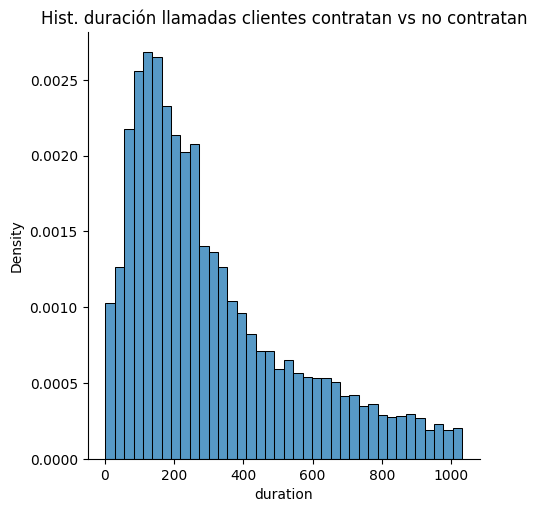

In [449]:
# Graficamos el histograma con seaborn displot
sns.displot(data=df_BANK_vista_marketing[filter_sin_anom_duration],x="duration", kde=False, stat='density')
plt.title('Hist. duración llamadas clientes contratan vs no contratan',loc='center')
plt.show()


In [450]:
df_BANK_vista_marketing[filter_sin_anom_duration]["descripcion_duration"].value_counts()

descripcion_duration
medio-bajo    2802
medio-alto    2797
bajo          2770
alto          2156
Name: count, dtype: int64

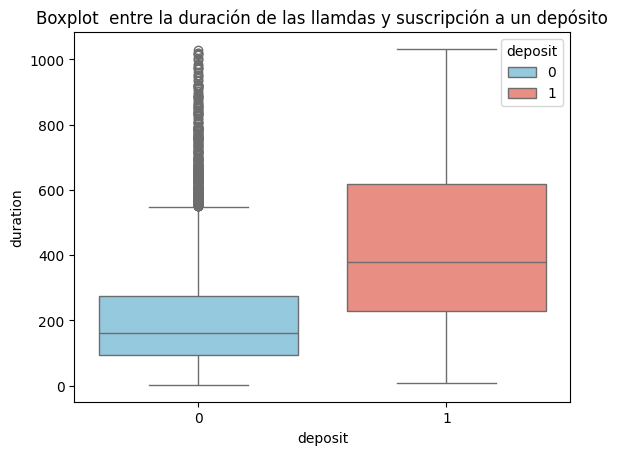

In [451]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='deposit', y='duration', data=df_BANK_vista_marketing[filter_sin_anom_duration],hue="deposit",palette=custom_palette)
plt.title('Boxplot  entre la duración de las llamdas y suscripción a un depósito')
plt.show()

Text(0.5, 1.0, 'Hist. número campaign')

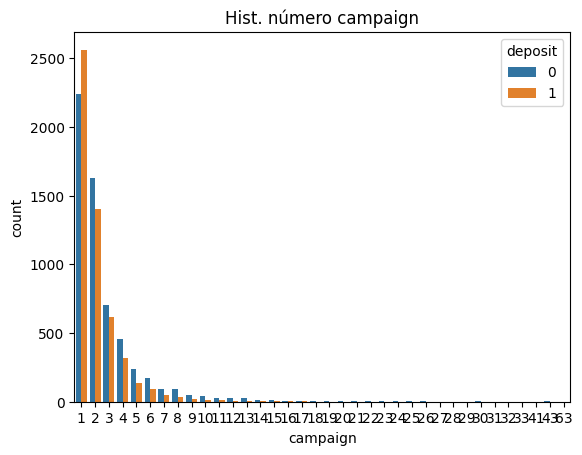

In [452]:
variable_categ="campaign"
g=sns.countplot(x=variable_categ,data=df_BANK_vista_marketing,hue='deposit')
plt.title('Hist. número campaign',loc='center')

In [453]:
Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['campaign'])
df_BANK_vista_marketing["descripcion_campaign"] = df_BANK_vista_marketing["campaign"].apply(clasificacion_duration)
filter_campaign_extre_muy_alto=(df_BANK_vista_marketing["descripcion_campaign"]!="extremo muy alto") & (df_BANK_vista_marketing["descripcion_campaign"]!="muy alto")




C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\3913535121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["descripcion_campaign"] = df_BANK_vista_marketing["campaign"].apply(clasificacion_duration)


In [454]:
filter_campaign_extre_muy_alto.value_counts()

descripcion_campaign
True     10296
False      866
Name: count, dtype: int64

Text(0.5, 1.0, 'Hist. número campaign')

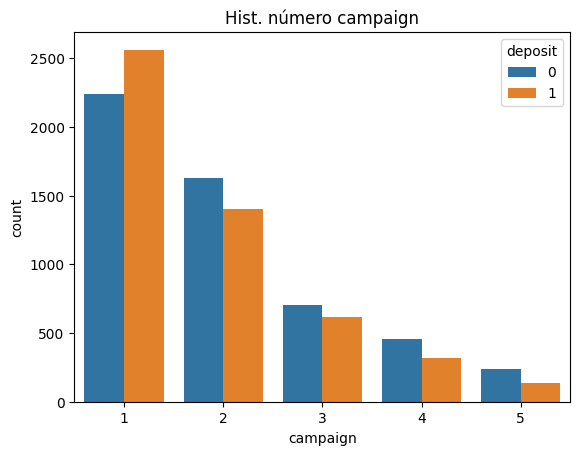

In [455]:
variable_categ="campaign"
g=sns.countplot(x=variable_categ,data=df_BANK_vista_marketing[filter_campaign_extre_muy_alto],hue='deposit')
plt.title('Hist. número campaign',loc='center')

## 3. Análisis mediante la tasa de conversión de contratación de depósitos

Quiero trocear el segmento duración en trocitos más pequeños, pero para eso quiero ver los estadísticos princiaples

In [456]:
df_BANK_vista_marketing['duration'].describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [457]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['duration'])
Q1, Q2, Q3, max_Q, max_Q_ext

(np.float64(138.0),
 np.float64(255.0),
 np.float64(496.0),
 np.float64(1033.0),
 np.float64(1570.0))

In [458]:
positive_infinity = float('inf')
df_BANK_vista_marketing['rango_duracion'] = pd.cut(df_BANK_vista_marketing['duration'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])
df_BANK_vista_marketing

C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\2879743195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing['rango_duracion'] = pd.cut(df_BANK_vista_marketing['duration'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])


,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,recod_poutcome,descripcion_duration,descripcion_campaign,rango_duracion
0,1,unknown,5,may,1042,1,-1,0,unknown,1,0,muy alto,medio-bajo,"(1033.0, 1570.0]"
1,3,unknown,5,may,1467,1,-1,0,unknown,1,0,muy alto,medio-bajo,"(1033.0, 1570.0]"
2,4,unknown,5,may,1389,1,-1,0,unknown,1,0,muy alto,medio-bajo,"(1033.0, 1570.0]"
3,5,unknown,5,may,579,1,-1,0,unknown,1,0,alto,medio-bajo,"(496.0, 1033.0]"
4,6,unknown,5,may,673,2,-1,0,unknown,1,0,alto,medio-alto,"(496.0, 1033.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11159,cellular,20,apr,257,1,-1,0,unknown,0,0,medio-alto,medio-bajo,"(255.0, 496.0]"
11158,11160,unknown,16,jun,83,4,-1,0,unknown,0,0,bajo,alto,"(0.0, 138.0]"
11159,11161,cellular,19,aug,156,2,-1,0,unknown,0,0,medio-bajo,medio-alto,"(138.0, 255.0]"
11160,11162,cellular,8,may,9,2,172,5,failure,0,0,bajo,medio-alto,"(0.0, 138.0]"


Quiero agrupar las etiquetas de range_duration y sumar los 1 de cada rango de los depósitos y los registros por depósito

In [459]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    11162 non-null  int64   
 1   contact               11162 non-null  object  
 2   day                   11162 non-null  int64   
 3   month                 11162 non-null  object  
 4   duration              11162 non-null  int64   
 5   campaign              11162 non-null  int64   
 6   pdays                 11162 non-null  int64   
 7   previous              11162 non-null  int64   
 8   poutcome              11162 non-null  object  
 9   deposit               11162 non-null  int64   
 10  recod_poutcome        11162 non-null  int64   
 11  descripcion_duration  11162 non-null  object  
 12  descripcion_campaign  11162 non-null  object  
 13  rango_duracion        11162 non-null  category
dtypes: category(1), int64(8), object(5)
memory usage: 1.1+

In [460]:
agrup_duration_bins=df_BANK_vista_marketing.groupby('rango_duracion')
serie_1=agrup_duration_bins['duration'].mean()
serie_2=agrup_duration_bins['deposit'].sum()
serie_3=agrup_duration_bins['deposit'].count()

df_tasa_conversion = pd.concat([serie_1, serie_2, serie_3], axis = 1)
df_tasa_conversion.columns=["avg_duration","num_deposit_contratados","num_total_registros"]
df_tasa_conversion.reset_index(drop=False, inplace=True)
df_tasa_conversion


C:\Users\gorka\AppData\Local\Temp\ipykernel_43952\2436912694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrup_duration_bins=df_BANK_vista_marketing.groupby('rango_duracion')


,rango_duracion,avg_duration,num_deposit_contratados,num_total_registros
0,"(0.0, 138.0]",83.808571,336,2800
1,"(138.0, 255.0]",193.672278,1101,2792
2,"(255.0, 496.0]",353.913043,1560,2783
3,"(496.0, 1033.0]",707.710832,1720,2151
4,"(1033.0, 1570.0]",1233.770270,461,518
5,"(1570.0, inf]",1953.211864,111,118


In [461]:
df_tasa_conversion["categoria_rango_duracion"] = df_tasa_conversion["avg_duration"].apply(clasificacion_duration)
df_tasa_conversion

,rango_duracion,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion
0,"(0.0, 138.0]",83.808571,336,2800,bajo
1,"(138.0, 255.0]",193.672278,1101,2792,medio-bajo
2,"(255.0, 496.0]",353.913043,1560,2783,medio-alto
3,"(496.0, 1033.0]",707.710832,1720,2151,alto
4,"(1033.0, 1570.0]",1233.770270,461,518,muy alto
5,"(1570.0, inf]",1953.211864,111,118,extremo muy alto


In [462]:
# Crear una nueva columna 'Etiqueta' que concatena 'Intervalo' y 'Descripcion'
df_tasa_conversion['categoria_duracion'] = df_tasa_conversion.apply(lambda row: f"{row['rango_duracion']} - {row['categoria_rango_duracion']}", axis=1)
df_tasa_conversion

,rango_duracion,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion,categoria_duracion
0,"(0.0, 138.0]",83.808571,336,2800,bajo,"(0.0, 138.0] - bajo"
1,"(138.0, 255.0]",193.672278,1101,2792,medio-bajo,"(138.0, 255.0] - medio-bajo"
2,"(255.0, 496.0]",353.913043,1560,2783,medio-alto,"(255.0, 496.0] - medio-alto"
3,"(496.0, 1033.0]",707.710832,1720,2151,alto,"(496.0, 1033.0] - alto"
4,"(1033.0, 1570.0]",1233.770270,461,518,muy alto,"(1033.0, 1570.0] - muy alto"
5,"(1570.0, inf]",1953.211864,111,118,extremo muy alto,"(1570.0, inf] - extremo muy alto"


In [463]:
df_tasa_conversion['tasa_conversion']=df_tasa_conversion['num_deposit_contratados']/df_tasa_conversion['num_total_registros']


In [464]:
#dataset_tasa_conversion = dataset_tasa_conversion.sort_values(by='tasa_conversion',ascending=False)
df_tasa_conversion

,rango_duracion,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion,categoria_duracion,tasa_conversion
0,"(0.0, 138.0]",83.808571,336,2800,bajo,"(0.0, 138.0] - bajo",0.120000
1,"(138.0, 255.0]",193.672278,1101,2792,medio-bajo,"(138.0, 255.0] - medio-bajo",0.394341
2,"(255.0, 496.0]",353.913043,1560,2783,medio-alto,"(255.0, 496.0] - medio-alto",0.560546
3,"(496.0, 1033.0]",707.710832,1720,2151,alto,"(496.0, 1033.0] - alto",0.799628
4,"(1033.0, 1570.0]",1233.770270,461,518,muy alto,"(1033.0, 1570.0] - muy alto",0.889961
5,"(1570.0, inf]",1953.211864,111,118,extremo muy alto,"(1570.0, inf] - extremo muy alto",0.940678


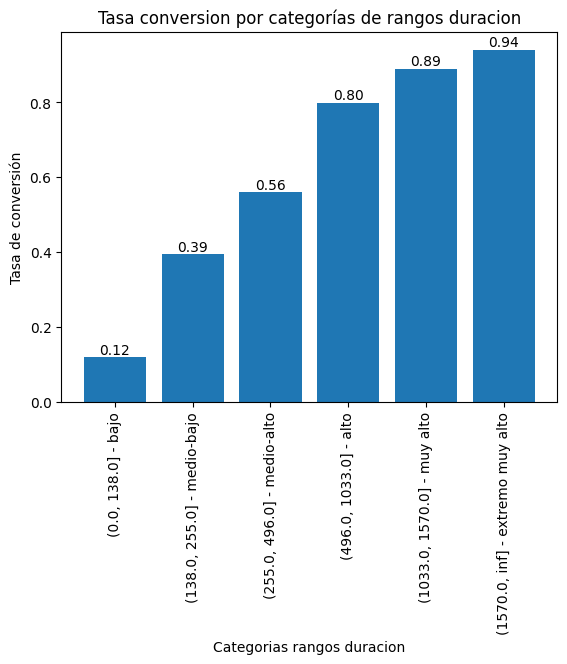

In [465]:
# Crear un gráfico de barras

fig, ax = plt.subplots()
bars=ax.bar(df_tasa_conversion['categoria_duracion'], df_tasa_conversion['tasa_conversion'])
# Añadir títulos y etiquetas
plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Categorias rangos duracion")
plt.ylabel("Tasa de conversión")

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

In [466]:
a=df_tasa_conversion.iloc[0,0]
a.right


np.float64(138.0)

### 4. Estimación de la probabilidad de contratación según la duración

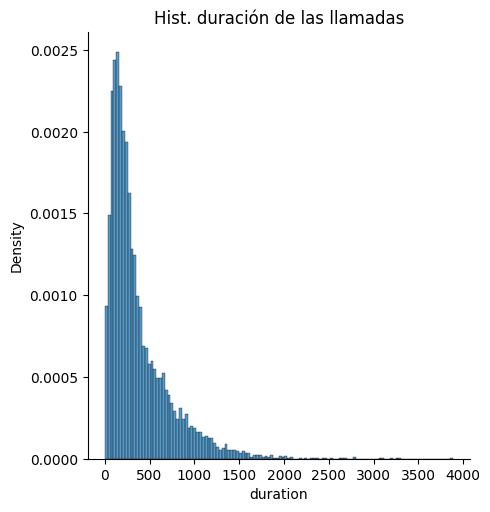

In [467]:
# Graficamos el histograma con seaborn displot
sns.displot(data=df_BANK_vista_marketing,x="duration", kde=False, stat='density')
plt.title('Hist. duración de las llamadas',loc='center')
plt.show()


In [468]:
# Datos de ejemplo
data = df_BANK_vista_marketing['duration']

# Ajuste de la distribución gamma
#params = gamma.fit(data,floc=0)
params = gamma.fit(data)

# Los parámetros ajustados son:
k, loc, theta = params
print(params)


(np.float64(1.3507610396242085), np.float64(1.9655830987458083), np.float64(273.94046502381406))


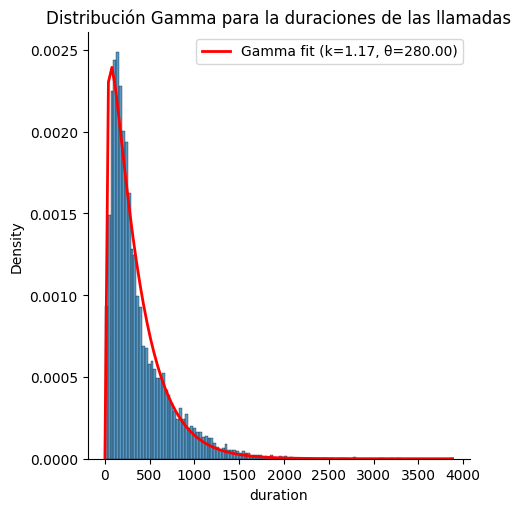

In [469]:
loc=20
k=1.17
theta=280

sns.displot(data=df_BANK_vista_marketing,x="duration", kde=False, stat='density')
plt.title('Hist. duración llamadas clientes contratan vs no contratan',loc='center')
x = np.linspace(min(data), max(data), 100)
pdf_gamma= gamma.pdf(x, a=k, loc=loc, scale=theta)

#plot=sns.displot(data=df_BANK_vista_marketing[filter_campaign_n_deposit_no],x="duration",bins=20,height=5, aspect=2)
#plot.set_axis_labels('duración', 'frecuencia')

plt.plot(x, pdf_gamma, 'r-', lw=2, label=f'Gamma fit (k={k:.2f}, θ={theta:.2f})')
plt.title('Distribución Gamma para la duraciones de las llamadas')
plt.legend()
plt.show()

In [470]:
def prob_gamma_rango_duracion(interv):

    gamma_dist = gamma(k, loc=loc, scale=theta)

    p_left = gamma_dist.cdf(interv.left)  # CDF en 250
    p_right = gamma_dist.cdf(interv.right)  # CDF en 500
    prob=p_right - p_left
    return(float(prob))

df_tasa_conversion["prob_rango_duracion"] = df_tasa_conversion["rango_duracion"].apply(prob_gamma_rango_duracion)
df_tasa_conversion
columns=["rango_duracion","tasa_conversion","prob_rango_duracion"]
df_tasa_conversion[columns]

,rango_duracion,tasa_conversion,prob_rango_duracion
0,"(0.0, 138.0]",0.120000,0.269250
1,"(138.0, 255.0]",0.394341,0.222081
2,"(255.0, 496.0]",0.560546,0.277072
3,"(496.0, 1033.0]",0.799628,0.194135
4,"(1033.0, 1570.0]",0.889961,0.031615
5,"(1570.0, inf]",0.940678,0.005847


In [471]:
df_tasa_conversion["prob_rango_duracion"]=df_tasa_conversion["prob_rango_duracion"].astype(float)
df_tasa_conversion

,rango_duracion,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion,categoria_duracion,tasa_conversion,prob_rango_duracion
0,"(0.0, 138.0]",83.808571,336,2800,bajo,"(0.0, 138.0] - bajo",0.120000,0.269250
1,"(138.0, 255.0]",193.672278,1101,2792,medio-bajo,"(138.0, 255.0] - medio-bajo",0.394341,0.222081
2,"(255.0, 496.0]",353.913043,1560,2783,medio-alto,"(255.0, 496.0] - medio-alto",0.560546,0.277072
3,"(496.0, 1033.0]",707.710832,1720,2151,alto,"(496.0, 1033.0] - alto",0.799628,0.194135
4,"(1033.0, 1570.0]",1233.770270,461,518,muy alto,"(1033.0, 1570.0] - muy alto",0.889961,0.031615
5,"(1570.0, inf]",1953.211864,111,118,extremo muy alto,"(1570.0, inf] - extremo muy alto",0.940678,0.005847


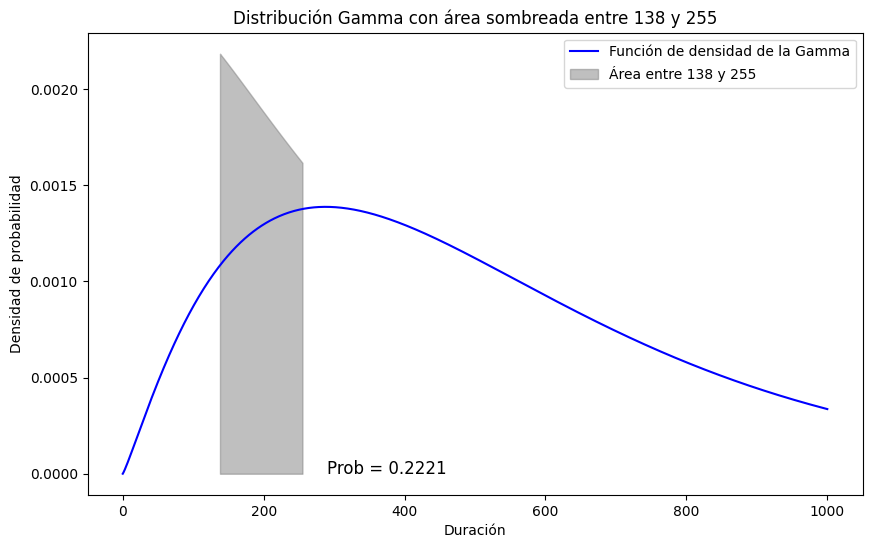

In [472]:
# Crear un rango de valores x
x = np.linspace(0, 1000, 1000)

# Calcular los valores de la función de densidad de probabilidad (PDF) para esos valores x
gamma_dist = gamma(k, loc=loc, scale=theta)

# Visualización de la función Gamma
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Función de densidad de la Gamma', color='blue')

# Sombrear el área bajo la curva entre 138 y 255
x_fill = np.linspace(138, 255, 1000)
y_fill = gamma_dist.pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5, label='Área entre 138 y 255')

# Calcular la probabilidad en el área sombreada
p_left = gamma_dist.cdf(138)  # CDF en 138
p_right = gamma_dist.cdf(255)  # CDF en 255
prob = p_right - p_left

x_prob = (250 + 500) / 2  # Punto medio en el rango de 250 a 500
y_prob = gamma_dist.pdf((gamma_dist.cdf(255)-gamma_dist.cdf(138))) / 2  # Aproximar la posición en el eje y
plt.text(x_prob, y_prob, f'Prob = {prob:.4f}', horizontalalignment='center', color='black', fontsize=12)

# Etiquetas y título
plt.title('Distribución Gamma con área sombreada entre 138 y 255')
plt.xlabel('Duración')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar la gráfica
plt.show()

In [473]:
df_tasa_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   rango_duracion            6 non-null      category
 1   avg_duration              6 non-null      float64 
 2   num_deposit_contratados   6 non-null      int64   
 3   num_total_registros       6 non-null      int64   
 4   categoria_rango_duracion  6 non-null      object  
 5   categoria_duracion        6 non-null      object  
 6   tasa_conversion           6 non-null      float64 
 7   prob_rango_duracion       6 non-null      float64 
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 742.0+ bytes


In [476]:
df_tasa_conversion["prob_contratar_depósito"] = df_tasa_conversion["prob_rango_duracion"]*df_tasa_conversion["tasa_conversion"]
df_tasa_conversion

,rango_duracion,avg_duration,num_deposit_contratados,num_total_registros,categoria_rango_duracion,categoria_duracion,tasa_conversion,prob_rango_duracion,prob_contratar_depósito
0,"(0.0, 138.0]",83.808571,336,2800,bajo,"(0.0, 138.0] - bajo",0.120000,0.269250,0.032310
1,"(138.0, 255.0]",193.672278,1101,2792,medio-bajo,"(138.0, 255.0] - medio-bajo",0.394341,0.222081,0.087576
2,"(255.0, 496.0]",353.913043,1560,2783,medio-alto,"(255.0, 496.0] - medio-alto",0.560546,0.277072,0.155312
3,"(496.0, 1033.0]",707.710832,1720,2151,alto,"(496.0, 1033.0] - alto",0.799628,0.194135,0.155236
4,"(1033.0, 1570.0]",1233.770270,461,518,muy alto,"(1033.0, 1570.0] - muy alto",0.889961,0.031615,0.028136
5,"(1570.0, inf]",1953.211864,111,118,extremo muy alto,"(1570.0, inf] - extremo muy alto",0.940678,0.005847,0.005500


In [481]:
df_tasa_conversion['num_deposit_contratados'].sum()

np.int64(5289)

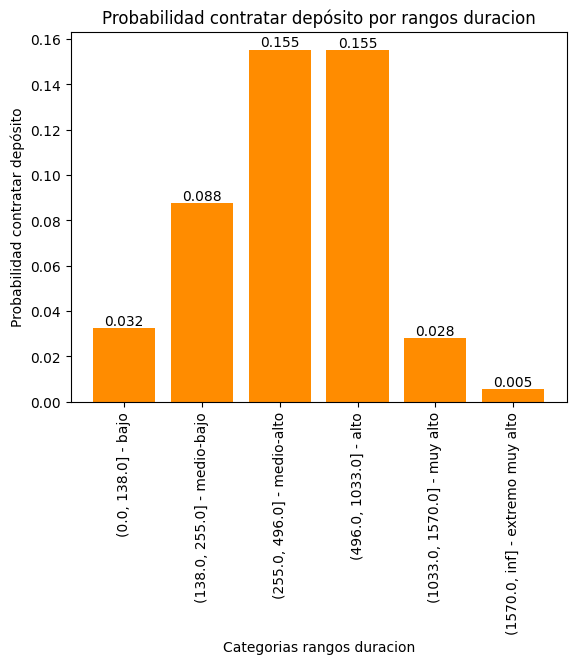

In [475]:
# Crear un gráfico de barras

fig, ax = plt.subplots()
#bars=ax.bar(df_tasa_conversion['categoria_duracion'], df_tasa_conversion['prob_contratar_depósito'],color='red')
bars=ax.bar(df_tasa_conversion['categoria_duracion'], df_tasa_conversion['prob_contratar_depósito'],color='#FF8C00')
# Añadir títulos y etiquetas
plt.xticks(rotation=90,fontsize=10)
plt.title("Probabilidad contratar depósito por rangos duracion")
plt.xlabel("Categorias rangos duracion")
plt.ylabel("Probabilidad contratar depósito")

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.3f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()